In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [2]:
from modules.sn_models import snowglobes_curves,other_sn_models

#### Settings

In [3]:
expt = 1 # halo 1 or 2
dist = 5 # distance to SN

plt.rc('font', family='serif')
plt.rc('axes', labelsize='xx-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='xx-large')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
#print(plt.rcParams.keys())
exp_size = 30
dist_size = 20
env_color = 'black'
env_weight = '2'

#### Distance Unknown Prior

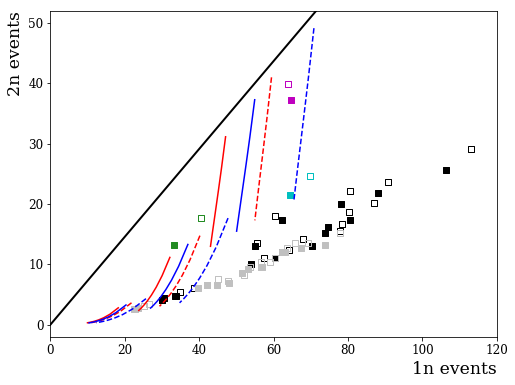

In [4]:
fig1,ax1 = plt.subplots(1,1)

# SN models
snowglobes_curves(ax1,expt,dist,True)
other_sn_models(ax1,expt,dist,True)

# scaling with distance and detector
scale = (5.0/dist)**2
if expt == 2:
    scale /= 0.079

# The prior
x = np.linspace(0,75*scale)
y = [8./11.*i for i in x]
ax1.plot(x,y,color=env_color,linewidth=env_weight)

# axis settings
ax1.set_xlim(0,120*scale)
ax1.set_ylim(-2,52*scale)
ax1.set_xlabel('1n events',horizontalalignment='right',x=1.0)
ax1.set_ylabel('2n events',horizontalalignment='right', y=1.0)

pylab.savefig('./figures/prior_dist_unknown_halo1_5kpc.png')

plt.show()

#### Distance Known Prior

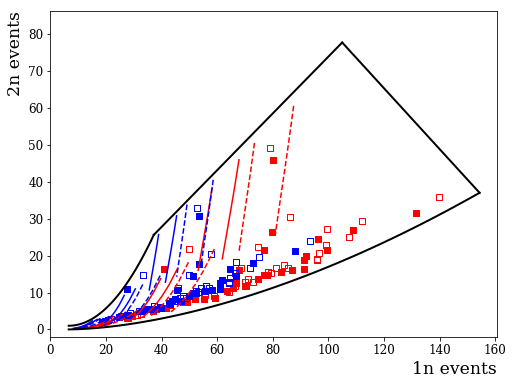

In [5]:
fig2,ax2 = plt.subplots(1,1)

dist_uncertainty = 0.10

# scaling with distance and detector
distc = dist*(1.-dist_uncertainty) # closer dist
distf = dist*(1.+dist_uncertainty) # farther dist
scalec = (5.0/distc)**2
scalef = (5.0/distf)**2
if expt == 2:
    scalec /= 0.079
    scalef /= 0.079

# SN models
snowglobes_curves(ax2,expt,distc,'r')
other_sn_models(ax2,expt,distc,'r')
snowglobes_curves(ax2,expt,distf,'b')
other_sn_models(ax2,expt,distf,'b')


# The prior ---------------------------------------------------------------------
# points for the envelope
# point 0       1          2          3          4
X = [8.*scalef,125.*scalec,85.*scalec,45.*scalef,8.*scalef]
Y = [0.,       30.*scalec, 63.*scalec,31.*scalef,1.       ]

# points 0 and 1 are connected by a polynomial of order 1.7: y1=A*(x1-x0)^1.7+y0
def f01(x):
    A = (Y[1]-Y[0])*(X[1]-X[0])**(-1.7)
    return A*(x-X[0])**(1.7)+y[0]

# points 1 and 2 are connected by a line
def f12(x):
    B = (Y[2]-Y[1])/(X[2]-X[1])
    return B*(x-X[1])+Y[1]

# points 2 and 3 are connected by a line
def f23(x):
    C = (Y[3]-Y[2])/(X[3]-X[2])
    return C*(x-X[2])+Y[2]

# points 3 and 4 are connected by a quadratic: y3=D*(x3-x4)^2+y4
def f34(x):
    D = (Y[3]-Y[4])*(X[3]-X[4])**(-2)
    return D*(x-X[4])**2+Y[4]

# set up xranges for each function
x01 = np.linspace(X[0],X[1])
x12 = np.linspace(X[2],X[1])
x23 = np.linspace(X[3],X[2])
x34 = np.linspace(X[4],X[3])

# plot each function
ax2.plot(x01,f01(x01),color=env_color,linewidth=env_weight)
ax2.plot(x12,f12(x12),color=env_color,linewidth=env_weight)
ax2.plot(x23,f23(x23),color=env_color,linewidth=env_weight)
ax2.plot(x34,f34(x34),color=env_color,linewidth=env_weight)
# The prior ---------------------------------------------------------------------


# axis settings
ax2.set_xlim(0,130*scalec)
ax2.set_ylim(-2,70*scalec)
ax2.set_xlabel('1n events',horizontalalignment='right',x=1.0)
ax2.set_ylabel('2n events',horizontalalignment='right', y=1.0)

pylab.savefig('./figures/prior_dist_known_halo1_5kpc.png')

plt.show()